In [1]:
##This dataset is from picklesueat, and contains more than 2000 job listings for data analyst positions, along with detailed information about these positions. The link is [https://www.kaggle.com/datasets/andrewmvd/data-analyst-jobs/data](https://www.kaggle.com/datasets/andrewmvd/data-analyst-jobs/data).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20204\3381811058.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data_analyst = pd.read_csv('DataAnalyst.csv')

In [4]:
# Rename columns for clarity
columns_to_rename = {
    "Job Title": "job_title", 
    "Salary Estimate": "salary_estimate", 
    "Job Description": "job_description", 
    "Company Name": "company_name", 
    "Location": "location", 
    "Headquarters": "headquarters", 
    "Size": "size", 
    "Type of ownership": "type_of_ownership", 
    "Industry": "industry", 
    "Sector": "sector", 
    "Revenue": "revenue", 
    "Easy Apply": "easy_apply"
}
data_analyst.rename(columns=columns_to_rename, inplace=True)

In [42]:
# Simplify job titles to avoid duplicates
job_title_replacements = {
    'Sr. Data Analyst|sr. data analyst|Sr Data Analyst|sr data analyst|senior data analyst|Senior Data Analyst|Data Analyst III|data analyst iii': 'Senior Data Analyst',
    'Data Analyst I|data analyst i|Data Analyst Junior|data analyst junior|Junior Data Analyst|Junior Data AnalystI|Junior Data Analystl': 'Junior Data Analyst',
    'Data Analyst II|data analyst ii|Middle Data Analyst': 'Middle Data Analyst'
}
for pattern, replacement in job_title_replacements.items():
    data_analyst['job_title'] = data_analyst['job_title'].replace(pattern, replacement, regex=True)

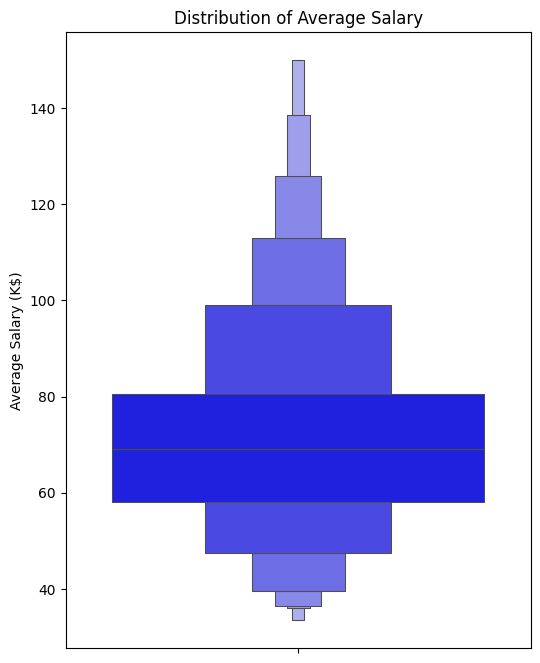

In [43]:
# Extract minimum and maximum salary from 'salary_estimate'
data_analyst[['MinSalary', 'MaxSalary']] = data_analyst['salary_estimate'].str.extract(r'\$(\d+)K-\$(\d+)K')

# Convert extracted salary strings to numeric
data_analyst['MinSalary'] = pd.to_numeric(data_analyst['MinSalary'], errors='coerce')
data_analyst['MaxSalary'] = pd.to_numeric(data_analyst['MaxSalary'], errors='coerce')

# Calculate the average salary
data_analyst['average_salary'] = (data_analyst['MinSalary'] + data_analyst['MaxSalary']) / 2

# Drop columns not needed for the plot
data_analyst.drop(['salary_estimate', 'MinSalary', 'MaxSalary'], axis=1, inplace=True)

# Create a vertical box plot
plt.figure(figsize=(6, 8))  # Change figure size as necessary
sns.boxenplot(data=data_analyst, y='average_salary', color='blue')  # Use a specific color
plt.ylabel('Average Salary (K$)')
plt.title('Distribution of Average Salary')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5392\2461709025.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ten_job_titles.values, y=top_ten_job_titles.index, palette='coolwarm')  # Using 'coolwarm' palette for a colorful plot


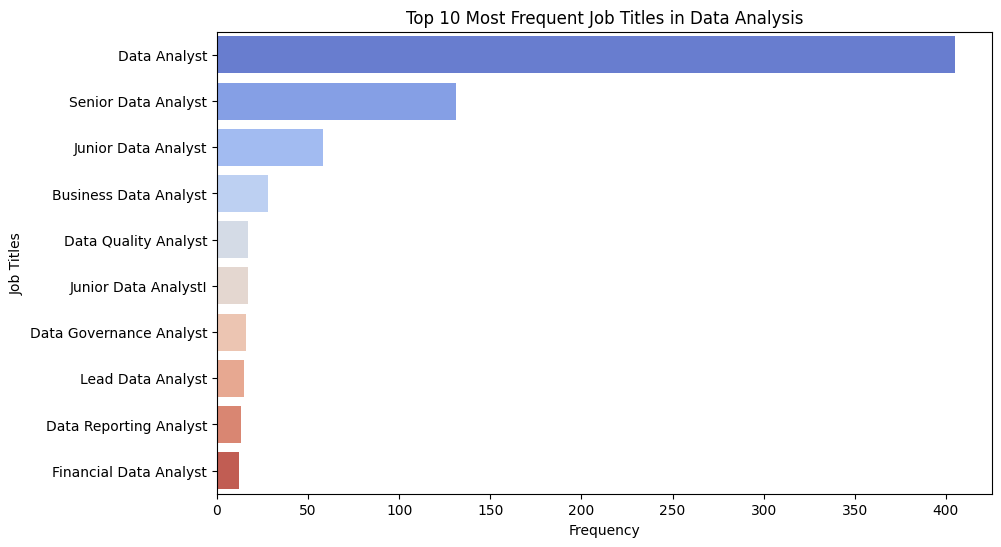

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_analyst' is your DataFrame and the 'job_title' column exists
# Get the top 10 most frequent job titles
top_ten_job_titles = data_analyst['job_title'].value_counts().nlargest(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust the size of the figure
sns.barplot(x=top_ten_job_titles.values, y=top_ten_job_titles.index, palette='coolwarm')  # Using 'coolwarm' palette for a colorful plot
plt.xlabel('Frequency')  # Label for the x-axis
plt.ylabel('Job Titles')  # Label for the y-axis
plt.title('Top 10 Most Frequent Job Titles in Data Analysis')  # Add a title to the chart

# Display the plot
plt.show()


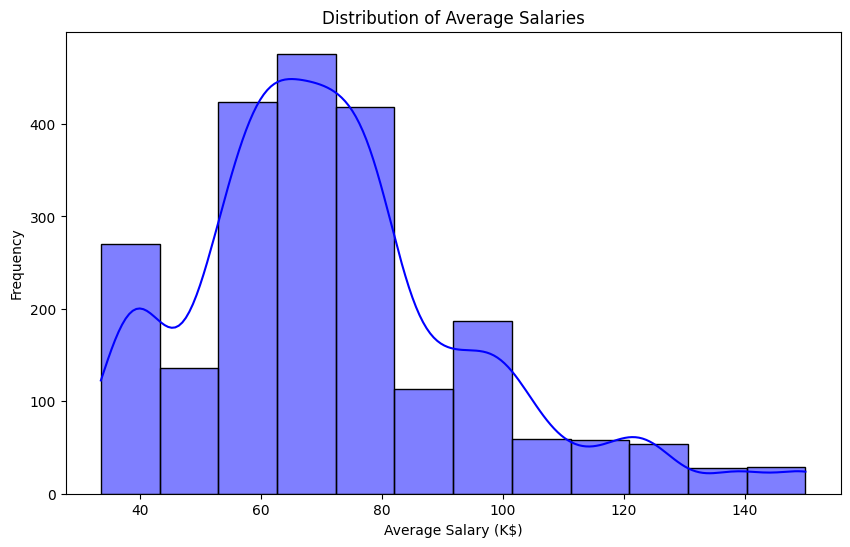

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram to visualize the distribution of average salaries
plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.histplot(data_analyst['average_salary'], kde=True, color='blue', binwidth=10)  # Use Seaborn to plot a histogram with a kernel density estimate overlaid
plt.title('Distribution of Average Salaries')  # Add a title to the chart
plt.xlabel('Average Salary (K$)')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis

# Display the plot
plt.show()
